<a href="https://colab.research.google.com/github/wastb/KIAM-Week8/blob/master/notebooks/fraud_detection_deeplearning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Objectives***

- *Analyzing and preprocessing transaction data.*
- *Creating and engineering features that help identify fraud patterns.*
- *Building and training machine learning models to detect fraud.*
- *Evaluating model performance and making necessary improvements.*
- *Deploying the models for real-time fraud detection and setting up monitoring for continuous improvement.*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten,SimpleRNN, Embedding, LSTM

from imblearn.over_sampling import SMOTE

In [3]:
## Load the dataset
df_fraud = pd.read_csv('/content/drive/MyDrive/transformed_fraud_data.csv')
df_credit_card = pd.read_csv('/content/drive/MyDrive/transformed_credit_card_data.csv')

In [4]:
## View sample credit card data
df_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [5]:
## View sample data
df_fraud.head()

,purchase_value,age,class,country,hour,month,day,weekday,frequency,velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,time_difference
0,0.172414,0.362069,0,84,2,4,18,5,1,0.172414,False,True,False,False,False,False,True,0.434673
1,0.048276,0.603448,0,171,1,6,8,0,1,0.048276,False,False,False,False,False,False,False,0.001731
2,0.041379,0.603448,1,171,18,1,1,3,1,0.041379,False,True,False,False,True,False,True,0.000000
3,0.241379,0.396552,0,172,13,5,4,0,1,0.241379,False,True,False,False,False,True,True,0.047462
4,0.206897,0.465517,0,171,18,9,9,2,1,0.206897,False,False,False,False,False,True,True,0.420667


## ***Train Test Split***

In [6]:
## Feature and Target Separation for both datasets
X_fraud = df_fraud.drop(columns=['class'])
y_fraud = df_fraud['class']

X_credit = df_credit_card.drop(columns=['Class'])
y_credit = df_credit_card['Class']

In [7]:
## 80-20 Training and Test dataset split

## For Fraud Data
X_train_fraud,X_test_fraud,y_train_fraud,y_test_fraud = train_test_split(X_fraud,y_fraud,test_size=0.2, random_state=42,stratify=y_fraud)

## For Credit Card Data
X_train_credit,X_test_credit,y_train_credit,y_test_credit = train_test_split(X_credit,y_credit,test_size=0.2, random_state=42,stratify=y_credit)


In [8]:
## Print the class distribution
print(f"The distribution of fraud class in the fraud dataset: {y_train_fraud.value_counts()}")
print(f"The distribution of fraud class in the credit dataset: {y_train_credit.value_counts()}")

The distribution of fraud class in the fraud dataset: class
0    109568
1     11321
Name: count, dtype: int64
The distribution of fraud class in the credit dataset: Class
0    227451
1       394
Name: count, dtype: int64


### ***Observation***
***As evident from the code above, there is a class imbalance in both datasets. To address this issue and enhance model performance, we will apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.***

In [9]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_fraud_resampled, y_train_fraud_resampled = smote.fit_resample(X_train_fraud, y_train_fraud)
X_train_credit_resampled, y_train_credit_resampled = smote.fit_resample(X_train_credit,y_train_credit)

In [10]:
## Check for class imbalance
print(f"The distribution of fraud class in the fraud dataset: {y_train_fraud_resampled.value_counts()}")
print(f"The distribution of fraud class in the credit dataset: {y_train_credit_resampled.value_counts()}")

The distribution of fraud class in the fraud dataset: class
0    109568
1    109568
Name: count, dtype: int64
The distribution of fraud class in the credit dataset: Class
0    227451
1    227451
Name: count, dtype: int64


## ***Deep Learning Model Building and Training***

In [11]:
## Functions for model evaluation and confusion matrix plotting

## Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    return accuracy, report, conf_matrix

## Function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### ***1. Multi-Layer Perceptron***

In [12]:
## fit the mlp model
def train_mlp_model(x_train, y_train):
  mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
  mlp.fit(x_train, y_train)
  return mlp

In [13]:
## fit the model for fraud and credit dataset
mlp_fraud = train_mlp_model(X_train_fraud_resampled,y_train_fraud_resampled)
mlp_credit = train_mlp_model(X_train_credit_resampled,y_train_credit_resampled)


In [14]:
## Evaluate the model on the test dataset
accuracy_fraud_mlp, report_fraud_mlp, conf_matrix_fraud_mlp = evaluate_model(mlp_fraud,X_test_fraud,y_test_fraud)
accuracy_credit_mlp, report_credit_mlp, conf_matrix_credit_mlp = evaluate_model(mlp_credit,X_test_credit,y_test_credit)

print(f"Accuracy for Fraud Data: {accuracy_fraud_mlp}")
print(f"Classification Report for Fraud Data:")
print(report_fraud_mlp)

print(f"Accuracy for Credit Card Data: {accuracy_credit_mlp}")
print(f"Classification Report for Credit Card Data:")
print(report_credit_mlp)

Accuracy for Fraud Data: 0.8949806438804884
Classification Report for Fraud Data:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     27393
           1       0.45      0.56      0.50      2830

    accuracy                           0.89     30223
   macro avg       0.70      0.75      0.72     30223
weighted avg       0.91      0.89      0.90     30223

Accuracy for Credit Card Data: 0.9992802219023208
Classification Report for Credit Card Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.81      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



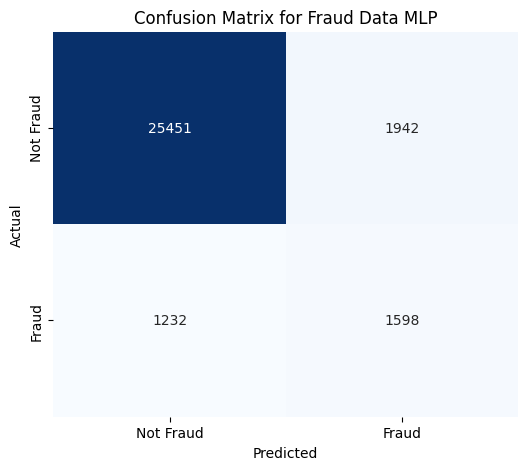

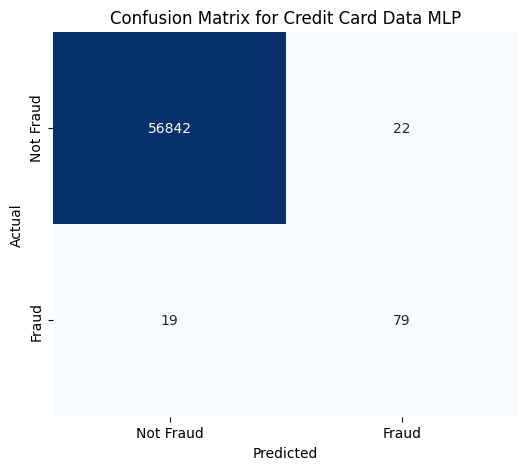

In [15]:
## Plot confusion matrix
plot_confusion_matrix(conf_matrix_fraud_mlp, title='Confusion Matrix for Fraud Data MLP')
plot_confusion_matrix(conf_matrix_credit_mlp, title='Confusion Matrix for Credit Card Data MLP')

In [16]:
#Save the Models
import joblib
joblib.dump(mlp_fraud, 'mlp_fraud.pkl')
joblib.dump(mlp_credit, 'mlp_credit.pkl')

['mlp_credit.pkl']

### ***2. Convolutional Neural Network***

In [17]:
# Function to plot training vs validation accuracy and loss
def plot_training_history(history):
    # Plotting training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

In [18]:
# Function to build CNN model
def build_cnn(input_shape):
    model = Sequential()

    # First convolutional layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [19]:
# Reshape the data for CNN input (CNN expects a 3D input)
X_train_credit_cnn = np.expand_dims(X_train_credit_resampled, axis=-1)
X_test_credit_cnn = np.expand_dims(X_test_credit, axis=-1)

X_train_fraud_cnn = np.expand_dims(X_train_fraud_resampled, axis=-1)
X_train_fraud_cnn = np.array(X_train_fraud_cnn, dtype=np.float32)
X_test_fraud_cnn = np.expand_dims(X_test_fraud, axis=-1)
X_test_fraud_cnn = np.array(X_test_fraud_cnn, dtype=np.float32)

# Convert target variables to categorical (since we're using classification)
y_train_credit_cnn = to_categorical(y_train_credit_resampled, 2)
y_test_credit_cnn = to_categorical(y_test_credit, 2)

y_train_fraud_cnn = to_categorical(y_train_fraud_resampled, 2)
y_test_fraud_cnn = to_categorical(y_test_fraud, 2)

In [20]:
# CNN model for Credit Card Data
cnn_credit = build_cnn(input_shape=(X_train_credit_cnn.shape[1], 1))
history_credit = cnn_credit.fit(X_train_credit_cnn, y_train_credit_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9583 - loss: 0.1095 - val_accuracy: 0.9989 - val_loss: 0.0089
Epoch 2/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9869 - loss: 0.0387 - val_accuracy: 0.9984 - val_loss: 0.0090
Epoch 3/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 4/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9999 - val_loss: 0.0033
Epoch 5/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 


Credit Card Data - Training vs Validation Accuracy and Loss:


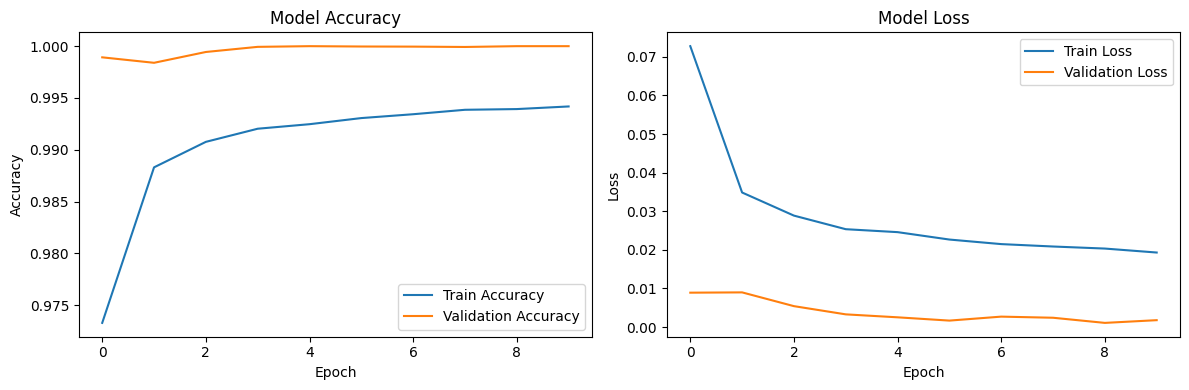

In [21]:
# Plot training vs validation accuracy and loss for Credit Card Data
print("\nCredit Card Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_credit)

In [22]:
# CNN model for Fraud Data
cnn_fraud = build_cnn(input_shape=(X_train_fraud_cnn.shape[1], 1))
history_fraud = cnn_fraud.fit(X_train_fraud_cnn, y_train_fraud_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

Epoch 1/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7081 - loss: 0.6947 - val_accuracy: 0.6340 - val_loss: 0.5441
Epoch 2/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8375 - loss: 0.4065 - val_accuracy: 0.6409 - val_loss: 0.5072
Epoch 3/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8468 - loss: 0.3894 - val_accuracy: 0.6446 - val_loss: 0.5252
Epoch 4/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8472 - loss: 0.3875 - val_accuracy: 0.6411 - val_loss: 0.5179
Epoch 5/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8472 - loss: 0.3863 - val_accuracy: 0.6421 - val_loss: 0.5321
Epoch 6/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8496 - loss: 0.3824 - val_accuracy: 0.6410 - val_loss: 0.5770
Epoch 7/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8502 - loss: 0.3814 - val_accuracy: 0.6412 - val_loss: 0.5572
Epoch 8/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8504 - loss: 0


Fraud Data - Training vs Validation Accuracy and Loss:


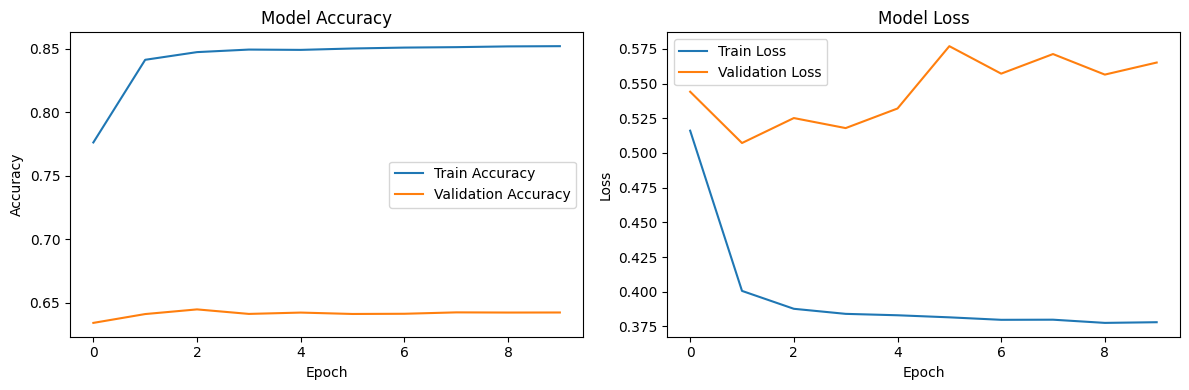

In [23]:
# Plot training vs validation accuracy and loss for Fraud Data
print("\nFraud Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_fraud)

In [24]:
# Function to evaluate the model and print metrics
def evaluate_model(model, X_test, y_test, y_test_labels):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.9955408869070609

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.90      0.41        98

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.00      1.00      1.00     56962



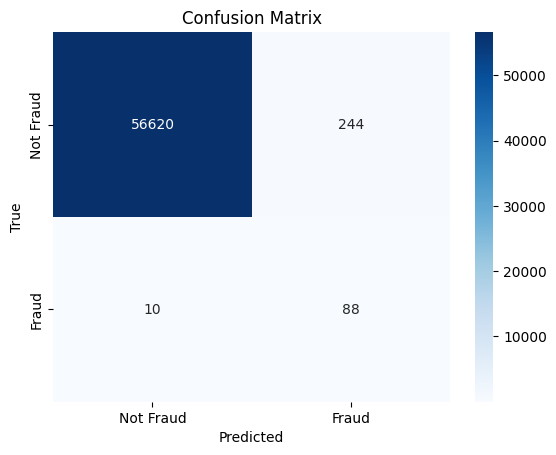

In [25]:
#Evaluate the Credit Model
evaluate_model(cnn_credit, X_test_credit_cnn, y_test_credit_cnn, y_test_credit)

945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.951758594447937

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.92      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.94      0.76      0.82     30223
weighted avg       0.95      0.95      0.95     30223



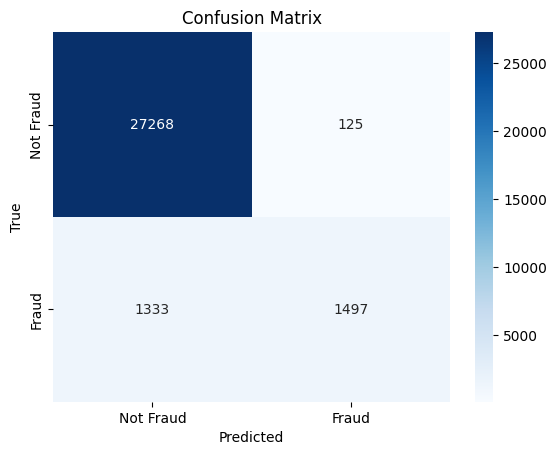

In [26]:
#Evaluate the Fraud Model
evaluate_model(cnn_fraud, X_test_fraud_cnn, y_test_fraud_cnn, y_test_fraud)

In [27]:
#Save the Models
joblib.dump(cnn_fraud, 'cnn_fraud.pkl')
joblib.dump(cnn_credit, 'cnn_credit.pkl')

['cnn_credit.pkl']

### ***3. Recurrent Neural Network***

In [28]:
# Define a simple RNN model
def build_rnn(input_shape, output_units):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape, return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_units, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# Build the model for Credit Card Data
rnn_credit = build_rnn(input_shape=(X_train_credit_cnn.shape[1], 1), output_units=2)
history_credit_rnn = rnn_credit.fit(X_train_credit_cnn, y_train_credit_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.9747 - loss: 0.0672 - val_accuracy: 0.9979 - val_loss: 0.0126
Epoch 2/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0261
Epoch 3/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9962 - val_loss: 0.0158
Epoch 4/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9960 - val_loss: 0.0112
Epoch 5/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9808 - val_loss: 0.0610
Epoch 6/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9845 - val_loss: 0.0447
Epoch 7/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9892 - val_loss: 0.0299
Epoch 8/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 


Fraud Data - Training vs Validation Accuracy and Loss:


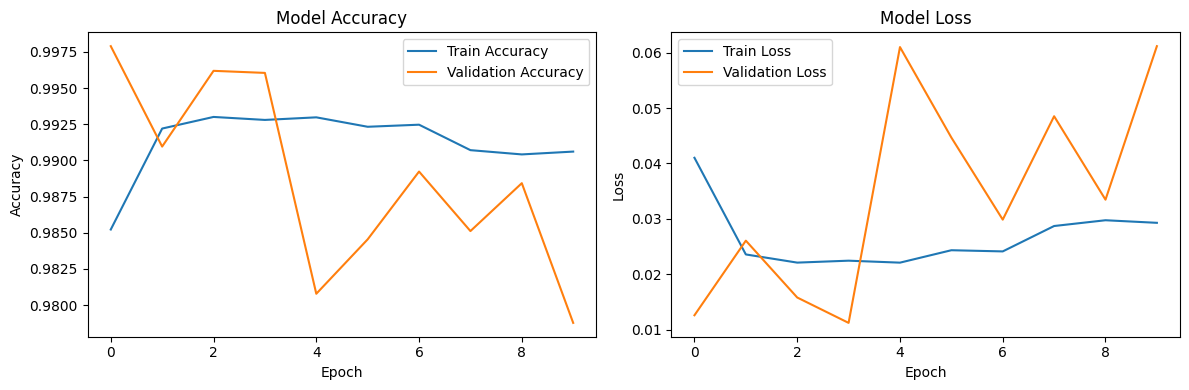

In [30]:
# Plot training vs validation accuracy and loss for Credit Data
print("\nFraud Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_credit_rnn)

In [31]:
#Build the model for Fraud Data
rnn_fraud = build_rnn(input_shape=(X_train_fraud_cnn.shape[1], 1), output_units=2)
history_fraud_rnn = rnn_fraud.fit(X_train_fraud_cnn, y_train_fraud_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

Epoch 1/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8463 - loss: 0.3786 - val_accuracy: 0.6922 - val_loss: 0.4794
Epoch 2/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.8711 - loss: 0.3362 - val_accuracy: 0.6922 - val_loss: 0.5200
Epoch 3/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8734 - loss: 0.3314 - val_accuracy: 0.6920 - val_loss: 0.4950
Epoch 4/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8712 - loss: 0.3327 - val_accuracy: 0.6915 - val_loss: 0.4696
Epoch 5/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8721 - loss: 0.3310 - val_accuracy: 0.6913 - val_loss: 0.4994
Epoch 6/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8726 - loss: 0.3299 - val_accuracy: 0.6914 - val_loss: 0.4862
Epoch 7/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8724 - loss: 0.3284 - val_accuracy: 0.6913 - val_loss: 0.4921
Epoch 8/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8733 - loss: 0


Fraud Data - Training vs Validation Accuracy and Loss:


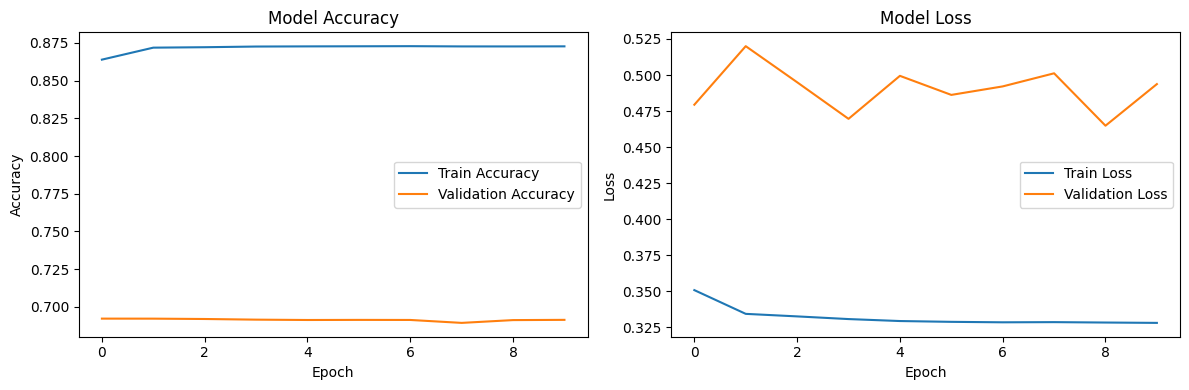

In [32]:
# Plot training vs validation accuracy and loss for Fraud Data
print("\nFraud Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_fraud_rnn)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9926968856430602

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.85      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.64     56962
weighted avg       1.00      0.99      1.00     56962



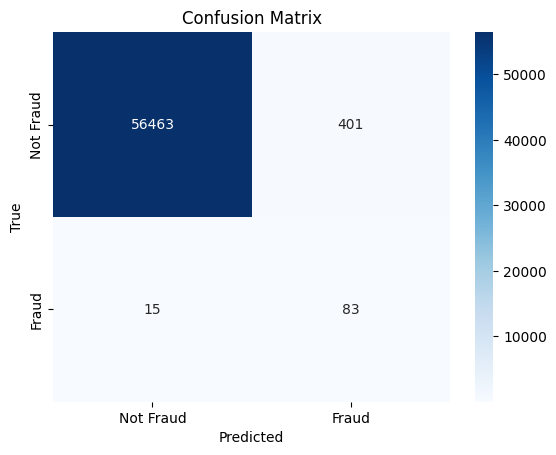

In [33]:
#Evaluate the Credit Model
evaluate_model(rnn_credit, X_test_credit_cnn, y_test_credit_cnn, y_test_credit)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.9521887304370843

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.93      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.94      0.76      0.82     30223
weighted avg       0.95      0.95      0.95     30223



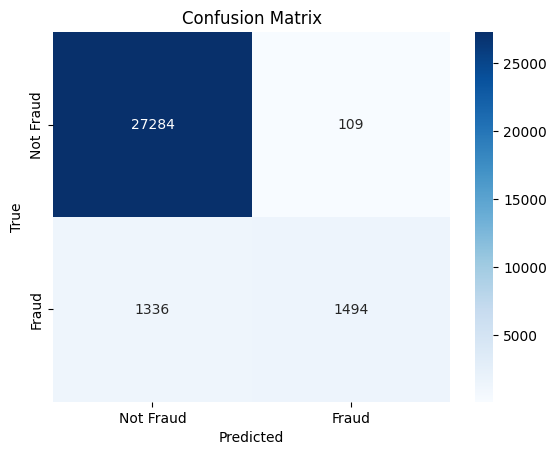

In [34]:
#Evaluate the Fraud Model
evaluate_model(rnn_fraud, X_test_fraud_cnn, y_test_fraud_cnn, y_test_fraud)

In [35]:
#Save the Models
joblib.dump(rnn_fraud, 'rnn_fraud.pkl')
joblib.dump(rnn_credit, 'rnn_credit.pkl')

['rnn_credit.pkl']

### ***4. Long Short-Term Memory***

In [36]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=2, activation='softmax'))  # 2 output units for binary classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
#Build the model for Credit Card Data
lstm_credit = build_lstm_model(input_shape=(X_train_credit_cnn.shape[1], 1))
history_credit_lstm = lstm_credit.fit(X_train_credit_cnn, y_train_credit_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - accuracy: 0.9529 - loss: 0.1408 - val_accuracy: 0.9822 - val_loss: 0.0473
Epoch 2/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 153s 10ms/step - accuracy: 0.9888 - loss: 0.0324 - val_accuracy: 0.9969 - val_loss: 0.0098
Epoch 3/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9959 - val_loss: 0.0120
Epoch 4/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 142s 10ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9963 - val_loss: 0.0124
Epoch 5/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 114s 10ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9987 - val_loss: 0.0052
Epoch 6/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 131s 9ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 7/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 151s 10ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9963 - val_loss: 0.0196
Epoch 8/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 113s 10ms/ste


Credit Data - Training vs Validation Accuracy and Loss:


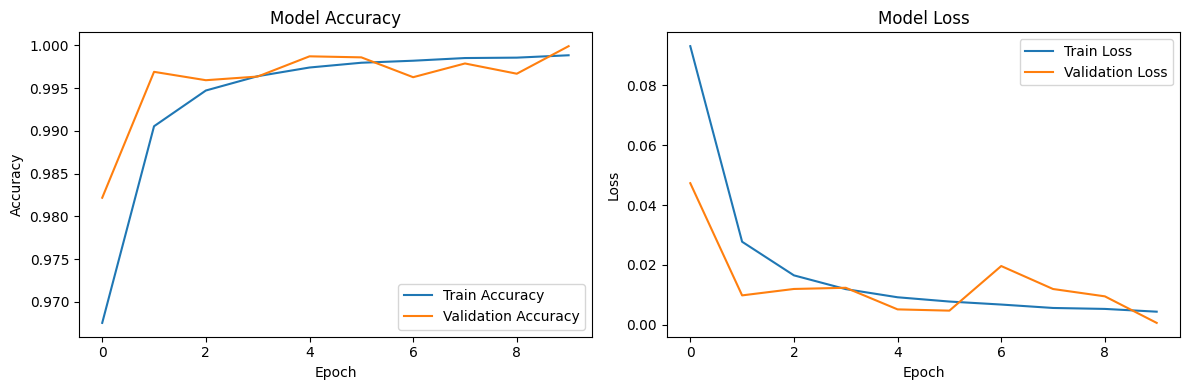

In [38]:
# Plot training vs validation accuracy and loss for Credit Data
print("\nCredit Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_credit_lstm)

In [39]:
#Build the model for fraud data
lstm_fraud = build_lstm_model(input_shape=(X_train_fraud_cnn.shape[1], 1))
history_fraud_lstm = lstm_fraud.fit(X_train_fraud_cnn, y_train_fraud_cnn,
                                        validation_split = 0.2,
                                        epochs=10, batch_size=32)

Epoch 1/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.8138 - loss: 0.4262 - val_accuracy: 0.6743 - val_loss: 0.5505
Epoch 2/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.8682 - loss: 0.3436 - val_accuracy: 0.6904 - val_loss: 0.4940
Epoch 3/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.8721 - loss: 0.3347 - val_accuracy: 0.6919 - val_loss: 0.4509
Epoch 4/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.8711 - loss: 0.3346 - val_accuracy: 0.6912 - val_loss: 0.4399
Epoch 5/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.8723 - loss: 0.3288 - val_accuracy: 0.6912 - val_loss: 0.4627
Epoch 6/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.8720 - loss: 0.3296 - val_accuracy: 0.6920 - val_loss: 0.4556
Epoch 7/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 88s 10ms/step - accuracy: 0.8723 - loss: 0.3268 - val_accuracy: 0.6915 - val_loss: 0.4715
Epoch 8/10
5479/5479 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - accuracy: 0.8728 - loss


Fraud Data - Training vs Validation Accuracy and Loss:


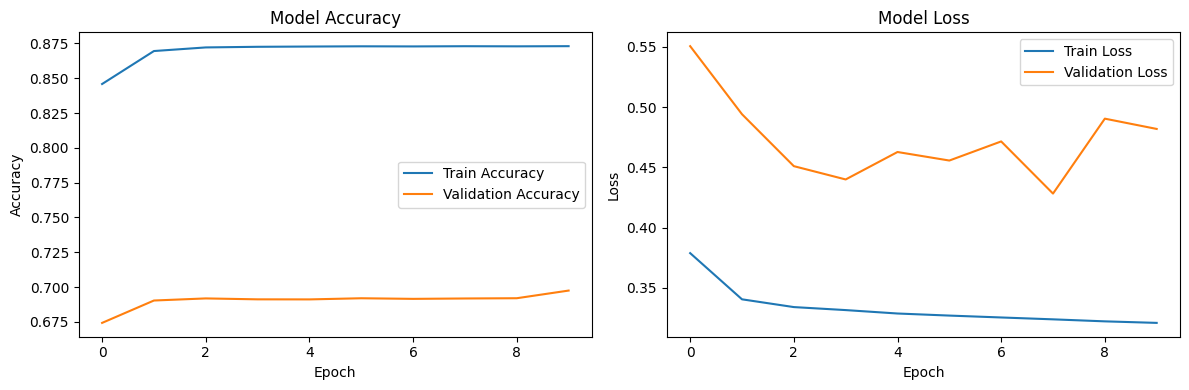

In [40]:
#Plot training vs validation accuracy and loss for fraud data
print("\nFraud Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_fraud_lstm)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Accuracy: 0.9980688880306169

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.86      0.60        98

    accuracy                           1.00     56962
   macro avg       0.73      0.93      0.80     56962
weighted avg       1.00      1.00      1.00     56962



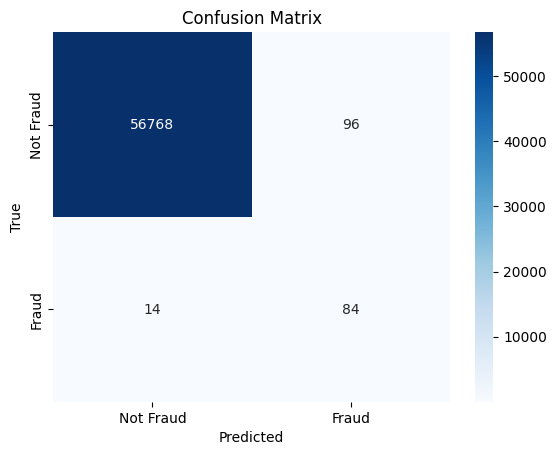

In [41]:
#Evaluate the Credit model
evaluate_model(lstm_credit, X_test_credit_cnn, y_test_credit_cnn, y_test_credit)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy: 0.9503358369453727

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     27393
           1       0.90      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.93      0.76      0.82     30223
weighted avg       0.95      0.95      0.94     30223



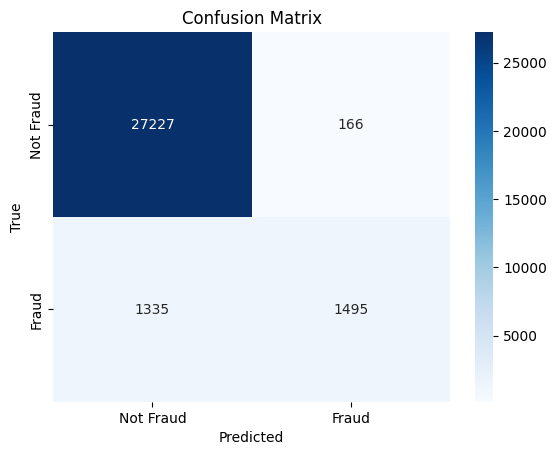

In [42]:
#Evaluate the Fraud Model
evaluate_model(lstm_fraud, X_test_fraud_cnn, y_test_fraud_cnn, y_test_fraud)

In [45]:
#Save the models
joblib.dump(lstm_fraud, 'lstm_fraud.pkl')
joblib.dump(lstm_credit, 'lstm_credit.pkl')

['lstm_credit.pkl']